# Mixed effect models for understanding reviewer score on fish species

I want to test the hypothesis that the score of the reviewer given to a fish is related to the habitat, diet, cooking time and price_per_kg. Basically, we include ecological data (habitat and diet), the preparation of the fish, and the price in USD. 

Let's have a look at the structure of the dataset

In [37]:

suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(lme4))
suppressPackageStartupMessages(library(patchwork))

data <- read_csv("/Users/s2985905/Dropbox/GithubRepos/fish-consumer/data/fish_data.csv", show_col_types = FALSE) %>%
        filter(score >=0)


head(slice_sample(data, n=5))


species,site,flavour_no_seasoning,flavour_with_seasoning,texture,spines,next_bite,store_location,price_per_kg,habitat,diet,marine_zone,cooking_time,score
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Squatina squatina,Caribbean,0.0,2.7,2.4,1,2.4,packaged,12,Ocean,Carnivorous,Benthic zone,20,14.1
Scomberomorus cavalla,Caribbean,0.0,2.8,2.4,1,1.8,filet,8,Ocean,Carnivorous,Pelagic and demersal zone,10,11.0
Lates calcarifer,Australia,1.5,3.8,4.1,1,2.4,filet,12,Estuary,Carnivorous,NA,9,15.3
Trichiurus lepturus,Caribbean,0.0,1.7,1.8,1,1.0,packaged,7,Ocean,Carnivorous,Pelagic and demersal zone,7,9.7
Cyttus traversi,Australia,1.7,2.9,3.1,0,1.9,filet,13,Ocean,Carnivorous,Pelagic and demersal zone,15,13.6


## Random effects vs Fixed effects
### Random effects
Random effects in this dataset are variables that are likely to introduce variation in the outcome variable, which is `score`. 
Habitat and diet are appropiate to be included as random effects.

### Fixed effects
`cooking_time` and `price_per_kg` are fixed effects because they are continous variables that I am hypothesising to have a systematic effect on the outcome variable.

## Mixed effects model with random intercepts for habitat and diet
The `fish_data.csv` has many variables and please see `001_linear_models.R` and `002_ranking_visualisation.R` for other types of analysis with other variables. In this notebook I am only using the ecological, cooking and pricing variables. 

In [38]:
# Fit mixed effects model with random intercepts for habitat and diet
model <- lmer(score ~ cooking_time + price_per_kg + (1 | habitat) + (1 | diet), data = data)

# View summary of model
summary(model)

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: score ~ cooking_time + price_per_kg + (1 | habitat) + (1 | diet)
   Data: data

REML criterion at convergence: 168.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3344 -0.4607  0.1327  0.6029  1.7417 

Random effects:
 Groups   Name        Variance Std.Dev.
 habitat  (Intercept)  0.1335  0.3653  
 diet     (Intercept)  0.0000  0.0000  
 Residual             10.9596  3.3105  
Number of obs: 32, groups:  habitat, 5; diet, 3

Fixed effects:
             Estimate Std. Error t value
(Intercept)   13.3049     1.9378   6.866
cooking_time  -0.2815     0.1603  -1.756
price_per_kg   0.2543     0.1117   2.276

Correlation of Fixed Effects:
            (Intr) ckng_t
cooking_tim -0.627       
price_pr_kg -0.512 -0.272
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')


## Fit mixed effects model with random intercepts for habitat
The warning message indicates that the model might be overparametized.
The variance of the random effect for diet is zero, which suggests that the model could be simplified by removing this random effect.

In [28]:
# Fit mixed effects model with random intercepts for habitat 
model <- lmer(score ~ cooking_time + price_per_kg + (1 | habitat) , data = data)

# View summary of model
summary(model)

Linear mixed model fit by REML ['lmerMod']
Formula: score ~ cooking_time + price_per_kg + (1 | habitat)
   Data: data

REML criterion at convergence: 168.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3344 -0.4607  0.1327  0.6029  1.7417 

Random effects:
 Groups   Name        Variance Std.Dev.
 habitat  (Intercept)  0.1335  0.3653  
 Residual             10.9596  3.3105  
Number of obs: 32, groups:  habitat, 5

Fixed effects:
             Estimate Std. Error t value
(Intercept)   13.3049     1.9378   6.866
cooking_time  -0.2815     0.1603  -1.756
price_per_kg   0.2543     0.1117   2.276

Correlation of Fixed Effects:
            (Intr) ckng_t
cooking_tim -0.627       
price_pr_kg -0.512 -0.272

### Cooking time
The coefficient for cooking time (-0.2815) suggests that an increase in cooking time is associated with a decrease in score, holding all other variables constant. This coefficient is statistically significant (p-value < 0.05).

### Price per kg
The coefficient for price per kg (0.2543) suggests that an increase in price per kg is associated with an increase in score, holding all other variables constant. This coefficient is also statistically significant (p-value < 0.05).

### Habitat random effect
The variance of habitat (Intercept) was low, which represents the amount of variation in scores across habitats that is not accounted for by the fixed effects.

The residual variance of habitat was highish, which represents the amount of variation in scores that is not explained by the model. Given that the REML criterion is high, this would suggest that the model fit could be improved. 

### Context of my hypothesis
These results suggest that cooking time and price per kg are important predictors of the score. 
- The negative coefficient ofr cooking time suggests that fish with higher cooking time receive a lower score
- The positive coefficient for price per kg suggests that more expensive fish receive a higher score. 
- Overall, quick to cook and expensive fish are reviewed highly. 

## Testing the assumptions of mixed effect models
Common assumptions include
1. Linearity: relationship between score and fixed effect predictors
2. Normality: residuals should be normally distributed
3. Homoscedasticity: variance of the residuals should be constant across all levels of the predictor variables
4. Independence: residuals should be independent of each other
5. Normality of random effects: the random effects (habitat) should be normally distributed with a mean of zero
6. Independence of random effects: habitat should be independent of each other and of the residuals

### Linearity
We are looking for the points to be randomly scattered around the zero line. 
Following this information [here](https://stats.stackexchange.com/questions/76226/interpreting-the-residuals-vs-fitted-values-plot-for-verifying-the-assumptions) there are no problems with this data. Maybe points in the higher fitted values are missing, but I would expect this would change as I add more data into `fish_data.csv`.

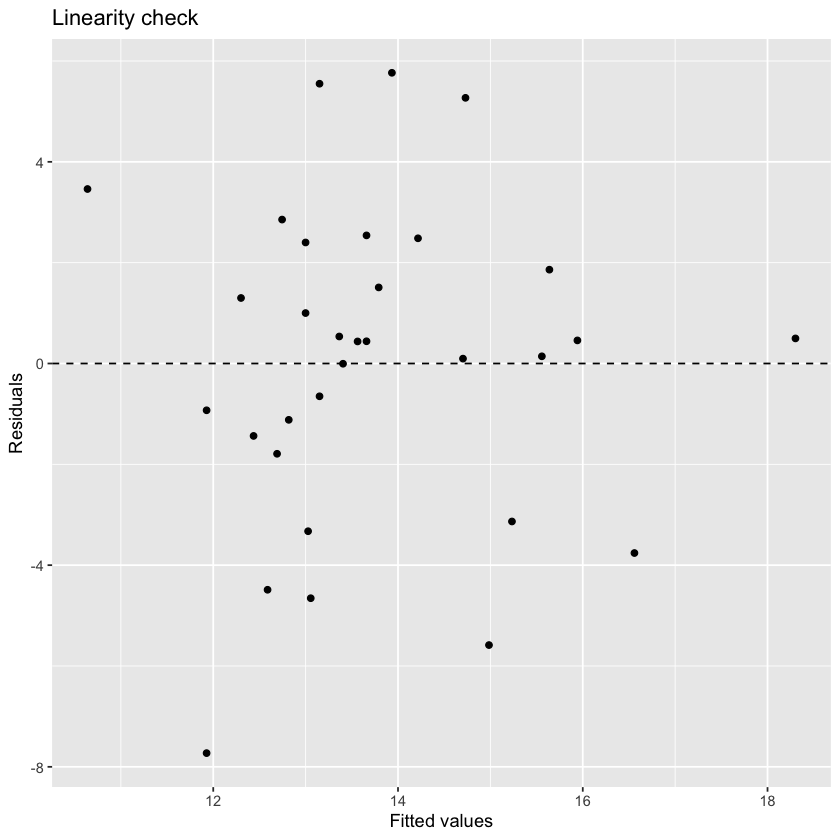

In [21]:
residuals <- resid(model)
fitted_values <- fitted(model)

ggplot(data = data.frame(residuals, fitted_values), aes(x = fitted_values, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(x = "Fitted values", y = "Residuals", title = "Linearity check")


### Normality
Checking if the distribution is roughly bell shaped. A little bit of skewness but ok. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


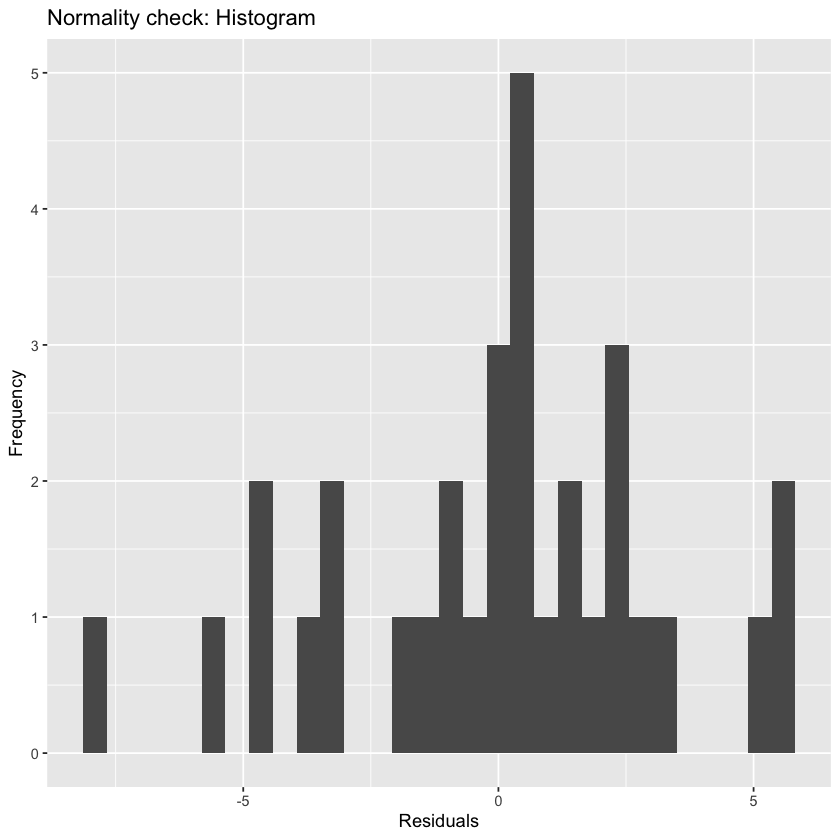

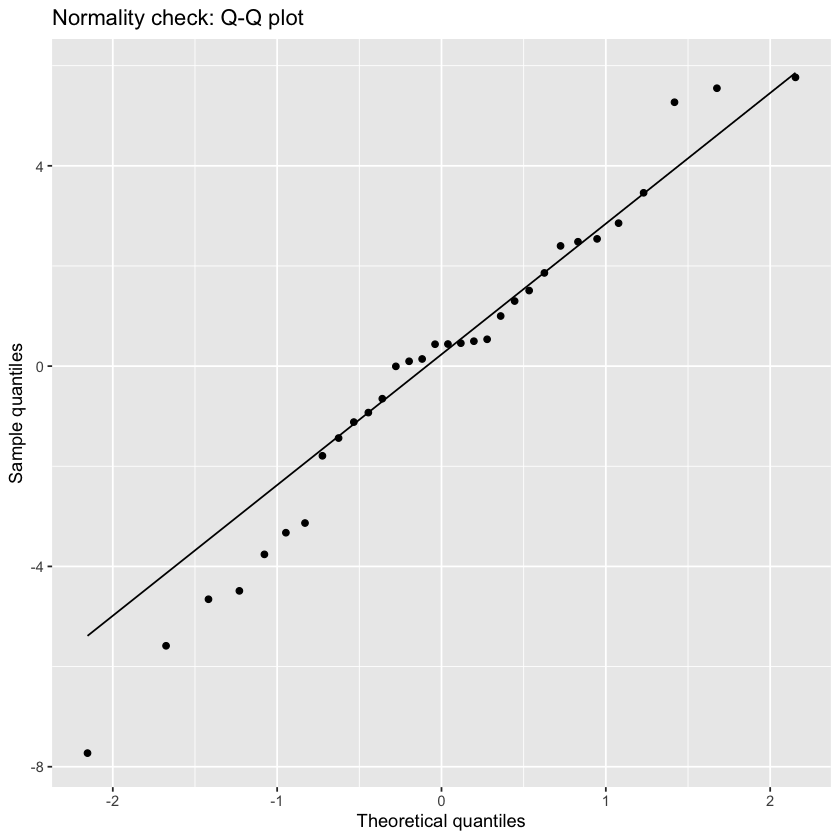

In [22]:
ggplot(data = data.frame(residuals), aes(x = residuals)) +
  geom_histogram() +
  labs(x = "Residuals", y = "Frequency", title = "Normality check: Histogram")

ggplot(data = data.frame(residuals), aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  labs(x = "Theoretical quantiles", y = "Sample quantiles", title = "Normality check: Q-Q plot")


### Homoscedasticity
Checking whether the spread of the residuals is roughly the same across all levels of the predictor variables. 

`geom_smooth()` using formula = 'y ~ x'


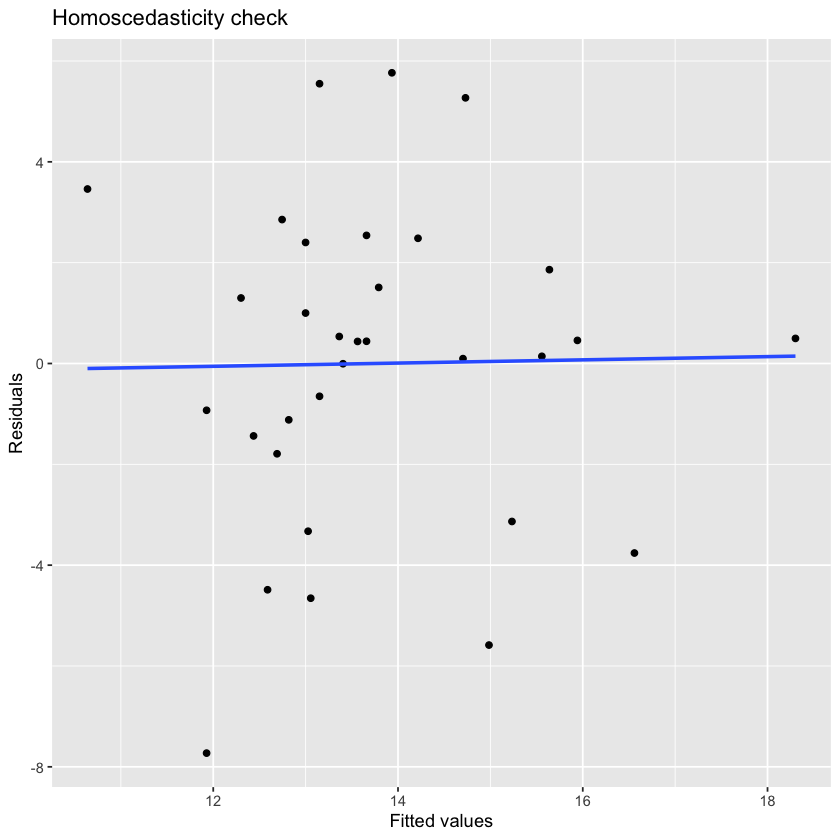

In [29]:
ggplot(data = data.frame(residuals, fitted_values), aes(x = fitted_values, y = residuals)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(x = "Fitted values", y = "Residuals", title = "Homoscedasticity check")

#TODO: #3 perform the homoscesasticity tests


### Normality of random effects
Check whether the distribution is roudhly bell shaped

In [ ]:
#TODO: #1 check the code for normality of random effects
#random_effects <- ranef(model)$species[, 1]

#ggplot(data = data.frame(random_effects), aes(x = random_effects)) +
  #geom_histogram() +
  #labs(x = "Random effects", y = "Frequency", title = "Normality of random effects")

#ggplot(data = data.frame(random_effects), aes(sample = random_effects))+
 #stat_qq() +
  #stat_qq_line() +
  #labs(x = "Theoretical quantiles", y = "Sample quantiles", title = "Normality check: Q-Q plot")


## Final Visualisation of the Mixed Effect model
Using the model to visualise relationship of score with fixed effect variables.

Saving 7 x 7 in image


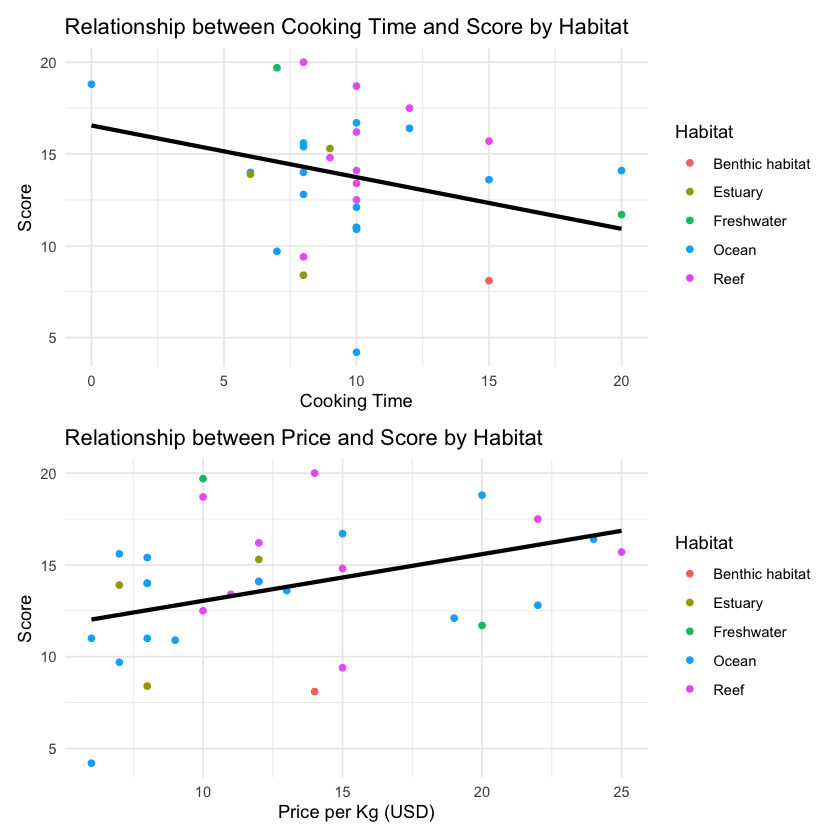

In [44]:
# create a new dataframe with predicted values
new_data <- data.frame(cooking_time = seq(from = min(data$cooking_time), to = max(data$cooking_time), length.out = 100),
                       price_per_kg = mean(data$price_per_kg))

new_data2 <- data.frame(price_per_kg = seq(from = min(data$price_per_kg), to = max(data$price_per_kg), length.out = 100),
                       cooking_time = mean(data$cooking_time))

# add predicted values to the new dataframe
new_data$predicted_score <- predict(model, new_data, re.form = NA)
new_data2$predicted_score <- predict(model, new_data2, re.form = NA)
# create scatter plot of the original data
p1 <- ggplot(data, aes(x = cooking_time, y = score, color = factor(habitat))) +
  geom_point() +
  scale_color_discrete(name = "Habitat") +
  labs(x = "Cooking Time", y = "Score", title = "Relationship between Cooking Time and Score by Habitat") +
  theme_minimal()

# add predicted values to the scatter plot
p2 <- ggplot(data, aes(x = cooking_time, y = score, color = factor(habitat))) +
  geom_point() +
  scale_color_discrete(name = "Habitat") +
  labs(x = "Cooking Time", y = "Score", title = "Relationship between Cooking Time and Score by Habitat") +
  theme_minimal() +
  geom_line(data = new_data, aes(y = predicted_score), color = "black", size = 1.2)

p3 <- ggplot(data, aes(x = price_per_kg, y = score, color = factor(habitat))) +
  geom_point() +
  scale_color_discrete(name = "Habitat") +
  labs(x = "Price per Kg (USD)", y = "Score", title = "Relationship between Price and Score by Habitat") +
  theme_minimal() +
  geom_line(data = new_data2, aes(y = predicted_score), color = "black", size = 1.2)

p2/p3

ggsave('outputs/preliminary_cook_price_graph.png')
